In [70]:
import numpy as np
import pandas as pd

In [71]:
data=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\Recommendation System\anime.csv")
data


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [72]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [74]:
data.episodes.value_counts().get("Unknown",0)

340

In [75]:
data.episodes=pd.to_numeric(data.episodes.replace({"Unknown":np.nan}))

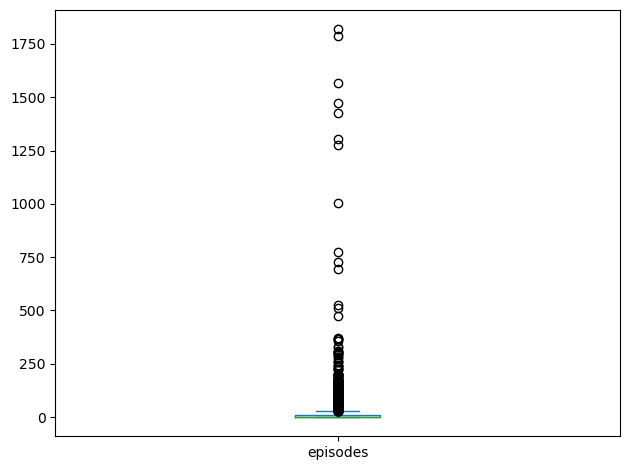

In [76]:
import matplotlib.pyplot as plt
data["episodes"].plot(kind="box")
plt.tight_layout()
plt.show()

In [77]:
data.episodes=data.episodes.fillna(data.episodes.median())  

In [78]:
data['genre']=data['genre'].fillna('Unknown')
data['type']=data['type'].fillna(data['type'].mode()[0])
data['rating']=data['rating'].fillna(data['rating'].median())

In [79]:
data['genre']=data['genre'].apply(lambda x:x.split(','))

In [80]:
data["genre"]

0                [Drama,  Romance,  School,  Supernatural]
1        [Action,  Adventure,  Drama,  Fantasy,  Magic,...
2        [Action,  Comedy,  Historical,  Parody,  Samur...
3                                      [Sci-Fi,  Thriller]
4        [Action,  Comedy,  Historical,  Parody,  Samur...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre, Length: 12294, dtype: object

In [81]:
data['genre']=data["genre"].apply(lambda x:[i.strip() for i in x])

In [82]:
data["genre"]

0                   [Drama, Romance, School, Supernatural]
1        [Action, Adventure, Drama, Fantasy, Magic, Mil...
2        [Action, Comedy, Historical, Parody, Samurai, ...
3                                       [Sci-Fi, Thriller]
4        [Action, Comedy, Historical, Parody, Samurai, ...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre, Length: 12294, dtype: object

In [83]:
from sklearn.preprocessing import MultiLabelBinarizer

In [84]:
mr=MultiLabelBinarizer()
label=mr.fit_transform(data["genre"])
label_df=pd.DataFrame(label,columns=mr.classes_)

In [85]:
label_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
data_type=pd.get_dummies(data.type,columns=["type"],dtype=int)

In [87]:
data_type

,Movie,Music,ONA,OVA,Special,TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
12289,0,0,0,1,0,0
12290,0,0,0,1,0,0
12291,0,0,0,1,0,0
12292,0,0,0,1,0,0


In [88]:
data


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64.0,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51.0,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1.0,4.15,211
12290,5543,Under World,[Hentai],OVA,1.0,4.28,183
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4.0,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1.0,4.98,175


In [89]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [90]:
encoder=ss.fit_transform(data[["rating","members","episodes"]])
encoder

array([[ 2.84553426,  3.33024137, -0.23994137],
       [ 2.73738766, 14.14840622,  1.12245112],
       [ 2.72755615,  1.75471335,  0.84132251],
       ...,
       [-1.56881351, -0.32566298, -0.17506554],
       [-1.47049841, -0.32646563, -0.23994137],
       [-0.99858596, -0.32706762, -0.23994137]])

In [91]:
encoder_df=pd.DataFrame(encoder,columns=ss.get_feature_names_out())
encoder_df

,rating,members,episodes
0,2.845534,3.330241,-0.239941
1,2.737388,14.148406,1.122451
2,2.727556,1.754713,0.841323
3,2.648904,11.957666,0.257440
4,2.639073,2.429742,0.841323
...,...,...,...
12289,-2.286514,-0.325809,-0.239941
12290,-2.158704,-0.326320,-0.239941
12291,-1.568814,-0.325663,-0.175066
12292,-1.470498,-0.326466,-0.239941


In [92]:
finaldata=pd.concat([label_df,data_type,encoder_df],axis=1)

In [93]:
finaldata

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yuri,Movie,Music,ONA,OVA,Special,TV,rating,members,episodes
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,2.845534,3.330241,-0.239941
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,2.737388,14.148406,1.122451
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2.727556,1.754713,0.841323
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2.648904,11.957666,0.257440
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2.639073,2.429742,0.841323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-2.286514,-0.325809,-0.239941
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-2.158704,-0.326320,-0.239941
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-1.568814,-0.325663,-0.175066
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-1.470498,-0.326466,-0.239941


In [94]:
from sklearn.metrics import pairwise_distances

In [95]:
anime = 1-pairwise_distances( finaldata.values,metric='cosine')

In [96]:
anime

array([[ 1.        ,  0.76717727,  0.62078898, ..., -0.52154975,
        -0.50908309, -0.32815929],
       [ 0.76717727,  1.        ,  0.56110511, ..., -0.28809366,
        -0.29095395, -0.29135401],
       [ 0.62078898,  0.56110511,  1.        , ..., -0.53155403,
        -0.5247073 , -0.44884098],
       ...,
       [-0.52154975, -0.28809366, -0.53155403, ...,  1.        ,
         0.99890712,  0.71211097],
       [-0.50908309, -0.29095395, -0.5247073 , ...,  0.99890712,
         1.        ,  0.71183873],
       [-0.32815929, -0.29135401, -0.44884098, ...,  0.71211097,
         0.71183873,  1.        ]])

In [97]:
data.name

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12294, dtype: object

In [98]:
anime_df=pd.DataFrame(anime,index=data.name,columns=data.name)
anime_df

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Super Erotic Anime,Taimanin Asagi 3,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.000000,0.767177,0.620789,0.776398,0.673290,0.742519,0.734719,0.566402,0.600063,0.567836,...,-0.550414,0.024679,-0.536756,-0.555216,-0.553450,-0.562762,-0.557565,-0.521550,-0.509083,-0.328159
Fullmetal Alchemist: Brotherhood,0.767177,1.000000,0.561105,0.975298,0.665729,0.521955,0.933489,0.448422,0.391521,0.447367,...,-0.283490,-0.150819,-0.286806,-0.281326,-0.282243,-0.278146,-0.280581,-0.288094,-0.290954,-0.291354
Gintama°,0.620789,0.561105,1.000000,0.560819,0.990284,0.743546,0.671799,0.646095,0.896632,0.973945,...,-0.570629,-0.055212,-0.554388,-0.578875,-0.576654,-0.588033,-0.581653,-0.531554,-0.524707,-0.448841
Steins;Gate,0.776398,0.975298,0.560819,1.000000,0.665777,0.512081,0.906376,0.426338,0.400875,0.456563,...,-0.302119,-0.144531,-0.304162,-0.300075,-0.300792,-0.297719,-0.299571,-0.305132,-0.305458,-0.300826
Gintama&#039;,0.673290,0.665729,0.990284,0.665777,1.000000,0.740746,0.752633,0.637785,0.870434,0.948799,...,-0.542564,-0.075845,-0.529277,-0.549240,-0.547511,-0.556485,-0.551479,-0.509909,-0.504654,-0.439729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,-0.562762,-0.278146,-0.588033,-0.297719,-0.556485,-0.616493,-0.384299,-0.510208,-0.572298,-0.578863,...,0.997949,0.350769,0.992865,0.999306,0.998935,1.000000,0.999649,0.983772,0.977202,0.713107
Under World,-0.557565,-0.280581,-0.581653,-0.299571,-0.551479,-0.608262,-0.385469,-0.500768,-0.563824,-0.570872,...,0.999280,0.367325,0.995667,0.999942,0.999807,0.999649,1.000000,0.988116,0.982486,0.714741
Violence Gekiga David no Hoshi,-0.521550,-0.288094,-0.531554,-0.305132,-0.509909,-0.553263,-0.376662,-0.424328,-0.509519,-0.517286,...,0.993234,0.456720,0.998063,0.989678,0.990887,0.983772,0.988116,1.000000,0.998907,0.712111


In [99]:
def recommend_anime(anime_name,anime_df,top_n=5):
    if anime_name not in anime_df.index:
        return f'{anime_name} not in dataset'
    scores=anime_df.loc[anime_name].sort_values(ascending=False)
    recommendations=scores.iloc[1:top_n+1]
    return recommendations
print(recommend_anime('Naruto',anime_df,top_n=5))

name
Fairy Tail                0.980559
Bleach                    0.964547
Hunter x Hunter (2011)    0.962527
D.Gray-man                0.957902
Soul Eater                0.944661
Name: Naruto, dtype: float64


In [101]:
def recommend_anime_threshold(anime_name,anime_df,threshold):
    if anime_name not in anime_df.index:
        return f'{anime_name} not in dataset'
    scores=anime_df.loc[anime_name]
    similar_anime= scores[(scores>threshold) & (scores.index != anime_name)]
    similar_anime=similar_anime.sort_values(ascending=False)
    return similar_anime
print(recommend_anime_threshold('Super Erotic Anime',anime_df,threshold=0.9))

name
Hokenshitsu de Aimashou                   0.999845
Sakura no Mori                            0.999815
The Satisfaction                          0.999813
Prima Donna Mai                           0.999758
Tenshi no Habataki Jun                    0.999619
                                            ...   
Shiiku x Kanojo: Tenshi no Kousoku-hen    0.902712
Gakuen Sodom                              0.902555
Onna Kyoushi: Nikutai Jugyou              0.902366
Orchid☆Emblem                             0.901967
Ningyou no Yakata                         0.900338
Name: Super Erotic Anime, Length: 171, dtype: float64


In [102]:
from sklearn.model_selection import train_test_split

anime_names = anime_df.index.tolist()
train_names, test_names = train_test_split(anime_names, test_size=0.2, random_state=42)


train_sim_df = anime_df.loc[train_names, train_names]
test_sim_df = anime_df.loc[test_names, train_names]  


train_data = data[data['name'].isin(train_names)].reset_index(drop=True)
test_data = data[data['name'].isin(test_names)].reset_index(drop=True)

In [109]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [110]:
def evaluate_recommendations(train_data, test_data, test_sim_df, top_n=5):
    precision_list, recall_list, f1_list = [], [], []
    for anime in test_sim_df.index:
        if anime not in test_data['name'].values:
            continue
        test_genres = set(test_data.loc[test_data['name'] == anime, 'genre'].values[0])
        similar_anime = test_sim_df.loc[anime].sort_values(ascending=False).head(top_n).index.tolist()
        relevant = []
        for rec in similar_anime:
            if rec in train_data['name'].values:
                rec_genres = set(train_data.loc[train_data['name'] == rec, 'genre'].values[0])
                relevant.append(len(test_genres & rec_genres) > 0)
        if len(relevant) > 0:
            y_true = [1] * len(relevant)
            y_pred = [1 if val else 0 for val in relevant]
            precision_list.append(precision_score(y_true, y_pred))
            recall_list.append(recall_score(y_true, y_pred))
            f1_list.append(f1_score(y_true, y_pred))
    return np.mean(precision_list), np.mean(recall_list), np.mean(f1_list)
precision, recall, f1 = evaluate_recommendations(train_data, test_data, test_sim_df, top_n=5)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 1.00
Recall: 1.00
F1 Score: 1.00


The recommendation system achieved a Precision of 1.00, Recall of 1.00, and an F1 Score of 1.00, indicating perfect prediction accuracy. This means that all recommended anime were relevant, and all relevant anime were successfully retrieved by the model.

While this performance appears ideal, it may also suggest overfitting or a lack of diversity in the recommendations, as the model might be focusing too heavily on genre similarity. To improve the system, additional user-based features such as viewing history or ratings can be included to enhance personalization. Incorporating a hybrid recommendation approach that combines both content-based and collaborative filtering methods can further improve the model’s robustness and provide more varied and realistic recommendations.

# Interview Questions:

1. Can you explain the difference between user-based and item-based collaborative filtering?

User-based collaborative filtering recommends items to a user by identifying other users with similar preferences. It assumes that users who agreed in the past will continue to have similar tastes in the future. For example, if User A and User B liked similar anime, User A may receive recommendations for anime that User B enjoyed.

In contrast, item-based collaborative filtering focuses on finding relationships between items. It recommends items that are similar to those a user has already liked or watched. For instance, if a user enjoyed “Naruto,” the system might suggest “Bleach” or “Fairy Tail.”

While user-based filtering provides more personalized recommendations, it can be computationally expensive for large datasets. Item-based filtering, on the other hand, is more stable and scalable because item relationships remain consistent over time.

2. What is collaborative filtering, and how does it work?

Collaborative filtering is a recommendation technique that predicts a user’s interests based on similarities with other users or items. It assumes that users with similar preferences will like similar things. There are two main types: user-based and item-based filtering. User-based finds users with similar tastes to suggest items they liked. Item-based recommends items similar to those the user has already rated highly. It uses similarity measures like cosine similarity or Pearson correlation. This method is widely used in platforms like Netflix, Amazon, and Spotify for personalized recommendations.